<a href="https://colab.research.google.com/github/jonitorta/Covid-analysis/blob/master/Example1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Cargamos librerias importantes.
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.impute import SimpleImputer

In [ ]:
#Creamos un dataset con el archivo.
file_name = "housing.csv"
housing = pd.read_csv(file_name)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
#Vemos las características generales de los datos.
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
#Observamos los valores categoritcos del data set.
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [ ]:
#Para darnos una idea general de como se distribuyen los datos.
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


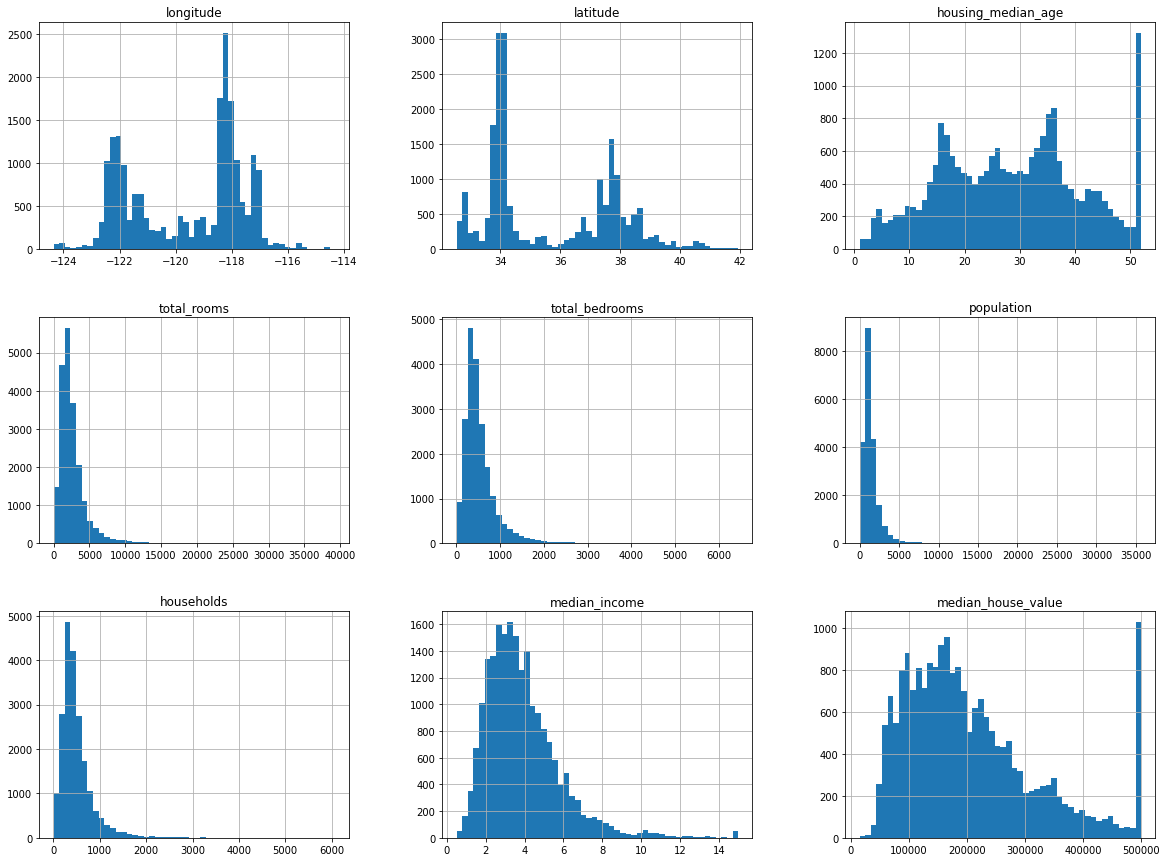

In [ ]:
#Vemos histogramas de las variables.
housing.hist(bins = 50 , figsize = (20,15))
plt.show()

In [ ]:
#El 80% de los datos son para el train set y el 20% para el test set.
instances = len(housing)
train_set = housing.iloc[0 : int(instances*0.8) ]
test_set = housing.iloc[int(instances*0.8):]

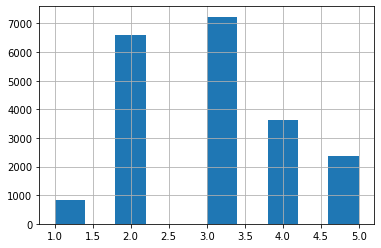

In [ ]:
#Distribuimos el ingreso medio en 5 categorías.
housing["income_cat"] = pd.cut (housing["median_income"],
                                bins = [0.,  1.5 , 3.0 , 4.5 , 6.0 , np.inf],
                                labels = [1,2,3,4,5])
housing["income_cat"].hist()
plt.show()

In [ ]:
#Distribuimos el dataset en muestras significativas según el ingreso medio.
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=25)
for train_index, test_index in split.split(housing, housing["income_cat"]):
 strat_train_set = housing.loc[train_index]
 strat_test_set = housing.loc[test_index]

In [ ]:
#Veamos cuantas muestras tenemos por categoría en el ingreso medio.
strat_test_set["income_cat"].value_counts() 

3    1447
2    1316
4     728
5     472
1     165
Name: income_cat, dtype: int64

In [ ]:
#Quitamos el atribute que agregamos
for item in (strat_train_set, strat_test_set):
 item.drop("income_cat", axis=1, inplace=True)

In [ ]:
#Creamos un data set de prueba
housing = strat_train_set.copy()

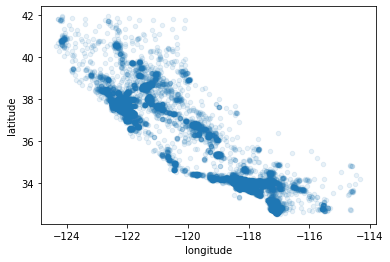

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
plt.show()

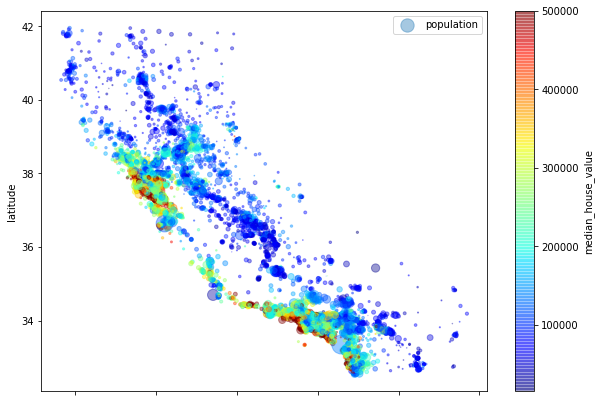

In [ ]:
#Una gráfica de la longitud y latitud, el color de los puntos representa el precio medio 
#en esa zone, el tamaño de los puntos la densidad de casas en la misma zona.
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
 s=housing["population"]/100, label="population", figsize=(10,7),
 c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.show()


In [ ]:
#Creamos un objeto para ver la correlacion entre el valor media de la casa
#con las otras características.
corr_matrix = housing.corr()

In [ ]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688299
total_rooms           0.135386
housing_median_age    0.107566
households            0.068105
total_bedrooms        0.051978
population           -0.021335
longitude            -0.038710
latitude             -0.150855
Name: median_house_value, dtype: float64

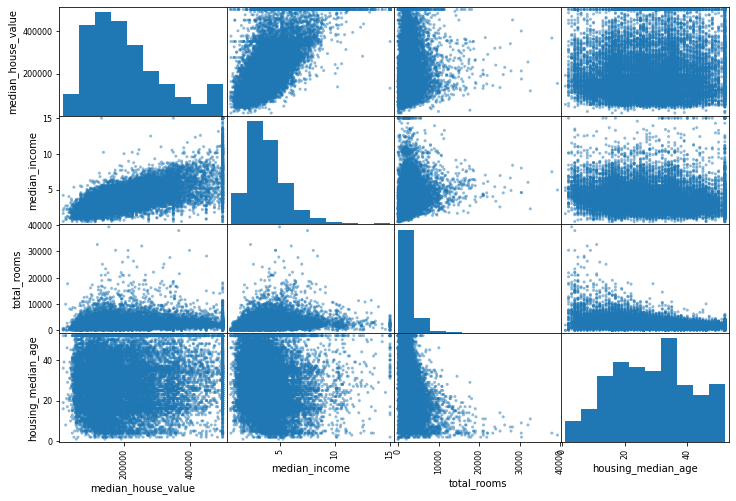

In [ ]:
#Veamos la correlación entre los atributos que ponemos en la lista de abajo.
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
 "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

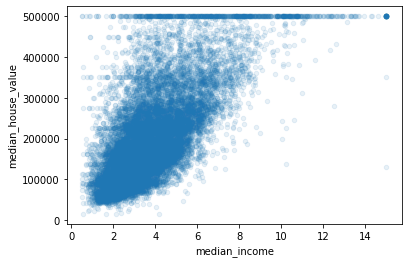

In [ ]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
 alpha=0.1)
plt.show()

In [ ]:
#Creamos 3 atributos mas
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [ ]:
#Vemoa la correlación entre el valor medio de la casa ahora con estos atributos nuevos.
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688299
rooms_per_household         0.145758
total_rooms                 0.135386
housing_median_age          0.107566
households                  0.068105
total_bedrooms              0.051978
population                 -0.021335
population_per_household   -0.022351
longitude                  -0.038710
latitude                   -0.150855
bedrooms_per_room          -0.255825
Name: median_house_value, dtype: float64

In [ ]:
#Creamos una copia sin el valor de la casa ya que es lo que queremos estimar.
housing = strat_train_set.drop("median_house_value", axis=1)
#Guardamos los valores para comparar cuando creemos el modelo.
housing_labels = strat_train_set["median_house_value"].copy()

In [ ]:
#El imputer simplemente remplaza valores nulos por la estategía en este caso la media.
imputer = SimpleImputer(strategy="median")
#Quitamos ocean proximity porque no es valor numérico y no le podemos sacar la media.
housing_num = housing.drop("ocean_proximity", axis=1)
#Esto calcula la media de cada atributo.
imputer.fit(housing_num)
#Esto contiene las medias ya, sol necesitamos ponerlo en el data frame.
X = imputer.transform(housing_num)

In [ ]:
#Lo ponemos en el data frame.
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

In [ ]:
#Pasamos nuestras catergorías a valores numéricos.
housing_cat = housing[["ocean_proximity"]]
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]
ordinal_encoder.categories_
from sklearn.preprocessing import OneHotEncoder
#Pasamos las categorías a vectores con entradas de 0 y solo un 1.
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [ ]:
#Esto es un transformador nos permite crear atributos nuevos, en este caso romms per household population
#per household.
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
 def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
  self.add_bedrooms_per_room = add_bedrooms_per_room
 def fit(self, X, y=None):
  return self # nothing else to do
 def transform(self, X, y=None):
  rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
  population_per_household = X[:, population_ix] / X[:, households_ix]
  if self.add_bedrooms_per_room:
    bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
    return np.c_[X, rooms_per_household, population_per_household,bedrooms_per_room]
  else:
    return np.c_[X, rooms_per_household, population_per_household]
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
 ('imputer', SimpleImputer(strategy="median")), #Cambia los valroes nulos por la media
 ('attribs_adder', CombinedAttributesAdder()), #Agrega los atributos con nuestro transformador 
 #personalizado
 ('std_scaler', StandardScaler()), #Cambia la escala a la estandarizada.
 ])
#aplicamos los cambios a el data set quitando los atributos que no son numéricos.
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [ ]:
from sklearn.compose import ColumnTransformer #Para aplicar todas las tranformaciones sobre
#Atributos numéricos y categoricos al mismo tiempo.
num_attribs = list(housing_num) #Lista atributos numéricos
cat_attribs = ["ocean_proximity"] #Atributo categorico
full_pipeline = ColumnTransformer([
 ("num", num_pipeline, num_attribs), #Pasamos la lista de atributos numéricos
 #con la pipeline que queremos usar
 ("cat", OneHotEncoder(), cat_attribs), #Pasamos los atributos categoricos con
 #el tranformador que queremos usar
 ])
#Tenemos nuestro data set ya transformado.
housing_prepared = full_pipeline.fit_transform(housing)

In [ ]:
#Importamos la regresión lineal.
from sklearn.linear_model import LinearRegression
#Creamos una estancia del objeto regresion lineal.
lin_reg = LinearRegression()
#Le pasamos como argumento nuestro data set ya limpio y los valores sobre los que queremos entrenar
#o sea el precio de las casas.
lin_reg.fit(housing_prepared, housing_labels )
#El objeto lin_reg ahora esta entrenado con la data.

LinearRegression()

In [ ]:
 some_data = housing.iloc[:5] #Comparamos el modelo vs el consto real.
 some_labels = housing_labels.iloc[:5]
 some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [139782.70365852 198057.92710189 244486.24256458  87939.4574031
  92185.81251294]
Labels: [142600.0, 162200.0, 254400.0, 89100.0, 62300.0]


In [ ]:
#Vemos que el error es muy alto
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68268.77182011926

In [ ]:
#Vemos un ejemplo de un modelo haciando overfitting
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [ ]:
from sklearn.model_selection import cross_val_score
#Una validación cruzada es partir el data set n veces y lo entrena 1 vez en cada partición,
#luego compara las predicciones con los 9 restantes y nos regresa los scores.
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
 scoring="neg_mean_squared_error", cv=10)
#como cross val score espera una funcion de utilidad entonces usamos neg_mean_square por eso es -
#cuando le sacamos la raiz.
tree_rmse_scores = np.sqrt(-scores)
tree_rmse_scores

array([69908.19092409, 68298.73105493, 67880.67714224, 70722.21977055,
       72181.26938447, 70041.87989504, 70992.91765924, 69895.47594981,
       71131.3295635 , 66790.48755642])

In [ ]:
def display_scores(scores):
  print("Scores:", scores)
  print("Mean:", scores.mean() ) # La media del error ahora es mayor que la de la regresión.
  print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [69908.19092409 68298.73105493 67880.67714224 70722.21977055
 72181.26938447 70041.87989504 70992.91765924 69895.47594981
 71131.3295635  66790.48755642]
Mean: 69784.31789002947
Standard deviation: 1574.422608188384


In [ ]:
#guardamos el modelo en formato pkl para ahorrar espacio.
#import joblib
#joblib.dump(tree_reg,"prueba.pkl")

['prueba.pkl']

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
#Esto sirve para ver que combinación de hyper parámetros es mejor
param_grid = [
 {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
 {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
 ]

In [ ]:
#Creamos un bosque aleatorio
forest_reg = RandomForestRegressor()
#Hacemos pruebas con el modelo bosque aleatorio con todas las combinaciones posbiles de hyper parámetros.
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
 scoring='neg_mean_squared_error',
return_train_score=True)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
#ahora con los hyper parámetros que mejores resultados regresaron
#entrenamos el modelo.
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
#Vemos que combinación de parámetros fue la mejor.
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [116]:
#Vemos el error medio de todas las combinaciones.
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
   print(np.sqrt(-mean_score), params)

64241.43402044454 {'max_features': 2, 'n_estimators': 3}
55201.126104766576 {'max_features': 2, 'n_estimators': 10}
52955.188280101516 {'max_features': 2, 'n_estimators': 30}
60740.48936852577 {'max_features': 4, 'n_estimators': 3}
53315.001127184536 {'max_features': 4, 'n_estimators': 10}
50343.004551369544 {'max_features': 4, 'n_estimators': 30}
59095.09373691817 {'max_features': 6, 'n_estimators': 3}
52104.87934465529 {'max_features': 6, 'n_estimators': 10}
50102.39014762089 {'max_features': 6, 'n_estimators': 30}
58155.399493550685 {'max_features': 8, 'n_estimators': 3}
51894.856233111524 {'max_features': 8, 'n_estimators': 10}
49914.4900027144 {'max_features': 8, 'n_estimators': 30}
61828.62193526626 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53947.917925165544 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60547.63993282843 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52446.38762672511 {'bootstrap': False, 'max_features': 3, 'n_estimator

In [115]:
#Recordar que existe un randomized search para tunear hyper parámetros.

In [120]:
#Vemos la importancia que tiene cada atributo
#en el modelo.
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.35212288404835257, 'median_income'),
 (0.16794280813776108, 'INLAND'),
 (0.1119328971990183, 'pop_per_hhold'),
 (0.07153372661354292, 'longitude'),
 (0.07043696411672953, 'rooms_per_hhold'),
 (0.06609867373009742, 'latitude'),
 (0.049728387579836365, 'bedrooms_per_room'),
 (0.04085247850869774, 'housing_median_age'),
 (0.015268512886510753, 'total_rooms'),
 (0.015011206174174736, 'population'),
 (0.014702551527935688, 'total_bedrooms'),
 (0.013292319401120493, 'households'),
 (0.0052904987567819455, '<1H OCEAN'),
 (0.0031525537418471113, 'NEAR OCEAN'),
 (0.002367677670954448, 'NEAR BAY'),
 (0.00026585990663893544, 'ISLAND')]

In [124]:
#vemos como se comporta el modelo en el test set
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
loc=squared_errors.mean(),
scale=stats.sem(squared_errors)))
#En esta tabla podemos ver la diferencia entre la predicción y los valores reales.
final_predictions-strat_test_set["median_house_value"]

9826     65976.666667
1202      9866.666667
16940   -12266.833333
9751    -45689.966667
17119    20050.000000
             ...     
17069   -31296.666667
9962    -56770.000000
9276      -866.666667
16307    43353.333333
6496     22243.333333
Name: median_house_value, Length: 4128, dtype: float64